In [1]:
import pandas as pd

from visualization import view_plateau, suffix_avg_plot

## Suffix vs Non-suffix Words

In [2]:
nlexique = pd.read_csv('../data/nlexique.csv')
# nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,variants,gen,sg,pl
0,à-côté,à-côté:accoté,m,akOte,akOte
1,à-coup,à-coup,m,aku,aku
2,à-peu-près,à-peu-près,m,apØpʁɛ,apØpʁɛ
3,à-pic,à-pic,m,apik,apik
4,à-plat,à-plat:aplat,m,apla,apla
...,...,...,...,...,...
31000,zurichois,zurichois,m,zyʁikwa,zyʁikwa
31001,zydeco,zydeco,f,zidəko,zidəko
31002,zygoma,zygoma,m,zigOma,zigOma
31003,zygote,zygote,m,zigɔt,zigɔt


In [3]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')

echantinom = (echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])] # rows
                       [['lemma', 'phon', 'gen', 'suffix', 'suffix_broad', 'sfx_allomorph']]    # columns
                       .fillna(0)
                       .reset_index(drop=True)
                       )

echantinom = (pd.merge(echantinom, nlexique, left_on='lemma', right_on='lexeme', how='left', suffixes=('', '_y'))
               .drop(columns=['lexeme', 'phon', 'gen_y'])
               .dropna()
               .reset_index(drop=True)
               )
echantinom

,lemma,gen,suffix,suffix_broad,sfx_allomorph,variants,sg,pl
0,berlingue,m,0,0,0,berlingue,bɛʁlɛ̃g,bɛʁlɛ̃g
1,corton,m,on,on,ɔ̃,corton,kɔʁtɔ̃,kɔʁtɔ̃
2,dabuche,f,uche,Vche,yʃ,dabuche,dabyʃ,dabyʃ
3,faf,m,0,0,0,faf,faf,faf
4,gail,f,0,0,0,gail,gaj,gaj
...,...,...,...,...,...,...,...,...
4527,palu,m,0,0,0,palu:palus,paly,paly
4528,talc,m,0,0,0,talc,talk,talk
4529,sauvetage,m,age,age,aʒ,sauvetage,sOvətaʒ,sOvətaʒ
4530,plaid,m,0,0,0,plaid,plɛd,plɛd


### Orthographic forms

In [4]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds = orth_preds.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,bi,bi,m,m,"[('i', {'f': 0.10226600617170334, 'm': 0.89773...",test,0
1,as,as,m,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test,0
2,an,ɑ̃,m,m,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test,0
3,té,te,m,m,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test,0
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test,0
...,...,...,...,...,...,...,...
4526,sous-alimentation,suzalimɑ̃tasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test,ion
4527,approvisionnement,apʁOvizjɔnəmɑ̃,m,m,"[('t', {'f': 0.33767399191856384, 'm': 0.66232...",test,ment
4528,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
4529,transsubstantiation,tʁɑ̃ssypstɑ̃tjasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test,ion


In [5]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.75259324652394

In [6]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test,0
6,mer,mɛʁ,m,f,"[('r', {'f': 0.3038800358772278, 'm': 0.696119...",test,0
10,glu,gly,m,f,"[('u', {'f': 0.5225964784622192, 'm': 0.477403...",test,0
16,clé,kle,m,f,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test,0
30,ire,iʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
...,...,...,...,...,...,...,...
4490,lance-missiles,lɑ̃smisil,f,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test,0
4493,côtes-du-rhône,kotdyʁon,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0
4510,perpendiculaire,pɛʁpɑ̃dikylɛʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,aire
4519,homme-grenouille,ɔmgʁənuj,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test,0


Run 1 of 1:


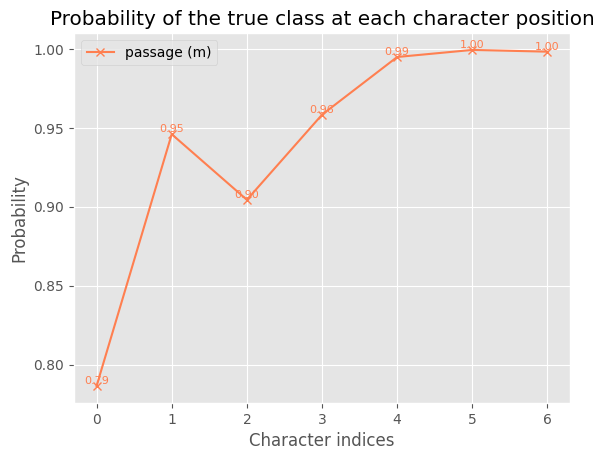

----------------------------------------------------------------------------------------------------

Run 1 of 1:


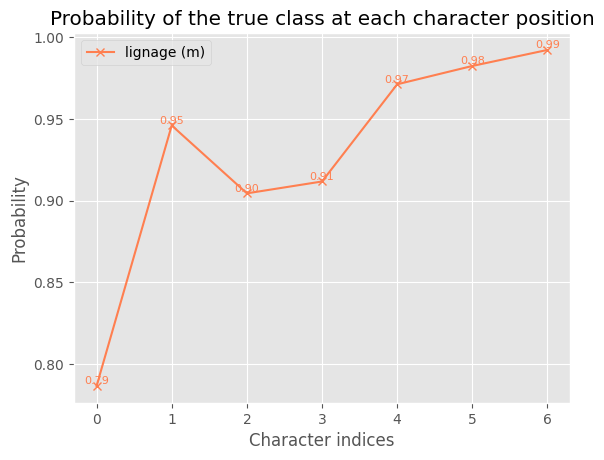

----------------------------------------------------------------------------------------------------

Run 1 of 1:


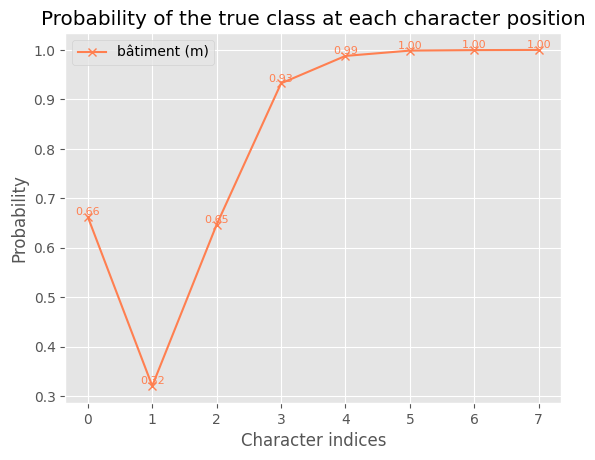

----------------------------------------------------------------------------------------------------

Run 1 of 1:


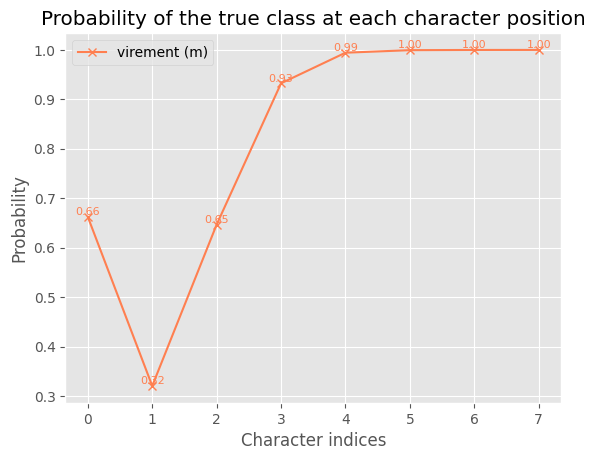

----------------------------------------------------------------------------------------------------

Run 1 of 1:


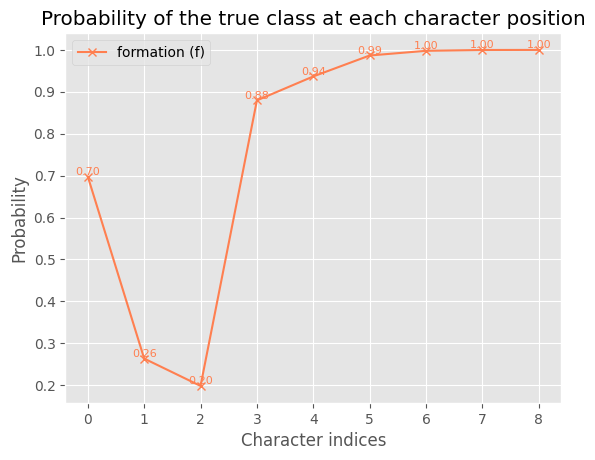

----------------------------------------------------------------------------------------------------

Run 1 of 1:


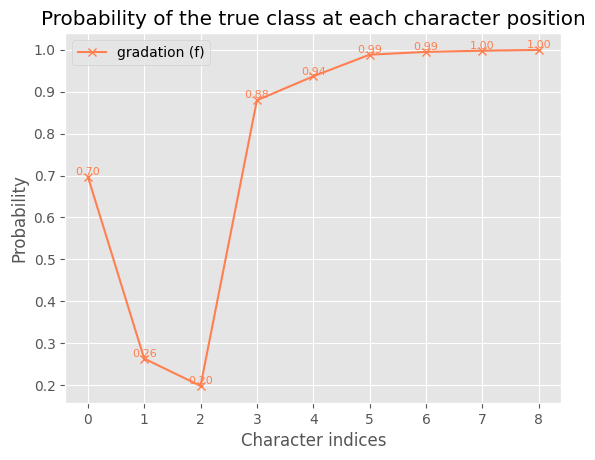

In [7]:
view_plateau(['passage'], orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['lignage'], orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['bâtiment'], orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['virement'], orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['formation'], orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['gradation'], orth_preds, binary=True)

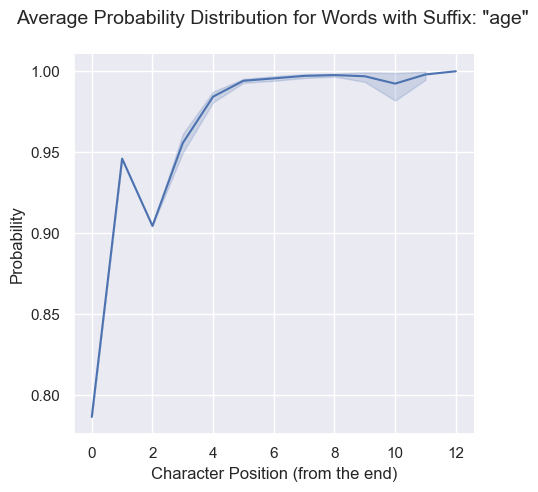

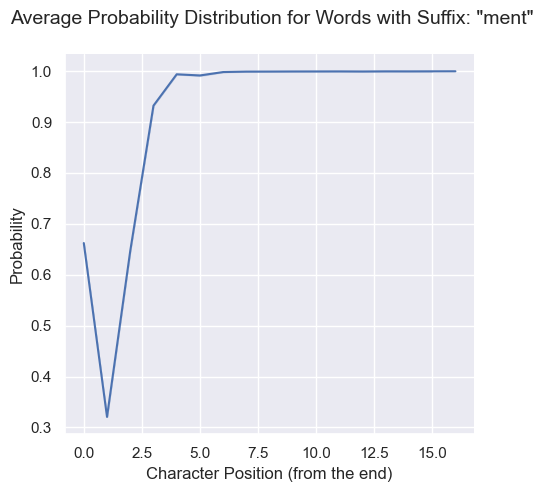

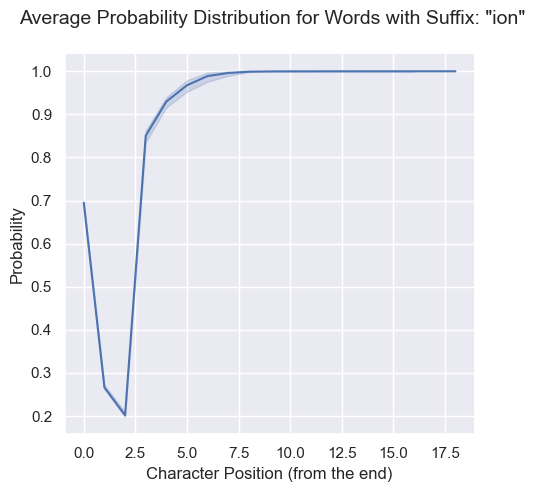

In [8]:
suffix_avg_plot(orth_preds, 'age')
suffix_avg_plot(orth_preds, 'ment')
suffix_avg_plot(orth_preds, 'ion')

In [10]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')
orth_preds_x10 = orth_preds_x10.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
orth_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run,suffix
0,an,m,m,"[('n', {'f': 0.4085073173046112, 'm': 0.591492...",test,1,0
1,bi,m,m,"[('i', {'f': 0.16074861586093903, 'm': 0.83925...",test,1,0
2,as,m,m,"[('s', {'f': 0.2868475317955017, 'm': 0.713152...",test,1,0
3,té,m,m,"[('é', {'f': 0.3696044683456421, 'm': 0.630395...",test,1,0
4,pie,f,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1,0
...,...,...,...,...,...,...,...
45305,approvisionnement,m,m,"[('t', {'f': 0.07809196412563324, 'm': 0.92190...",test,10,ment
45306,sous-alimentation,f,f,"[('n', {'f': 0.38623788952827454, 'm': 0.61376...",test,10,ion
45307,cul-de-basse-fosse,m,m,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10,0
45308,marie-couche-toi-là,f,f,"[('à', {'f': 0.28149473667144775, 'm': 0.71850...",test,10,0


Run 1 of 10:


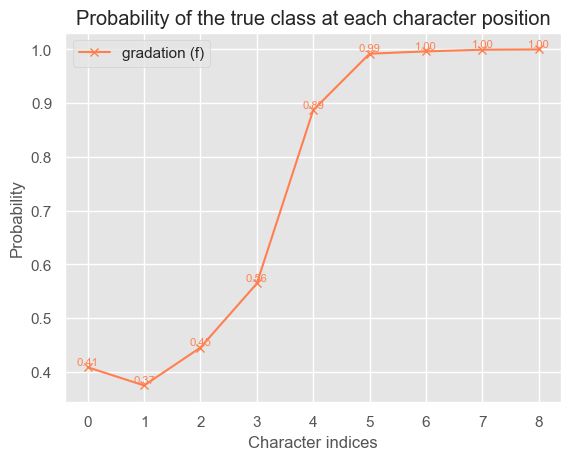

Run 2 of 10:


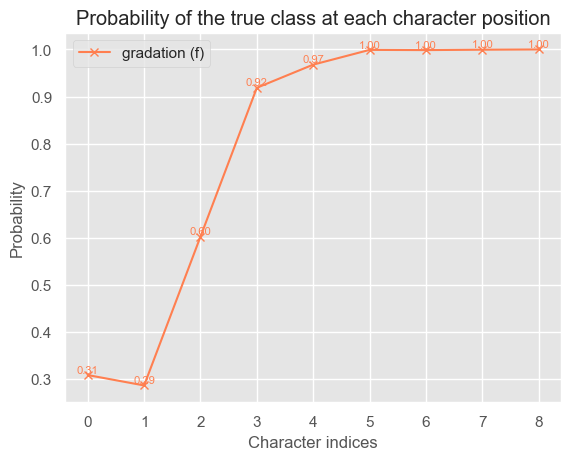

Run 3 of 10:


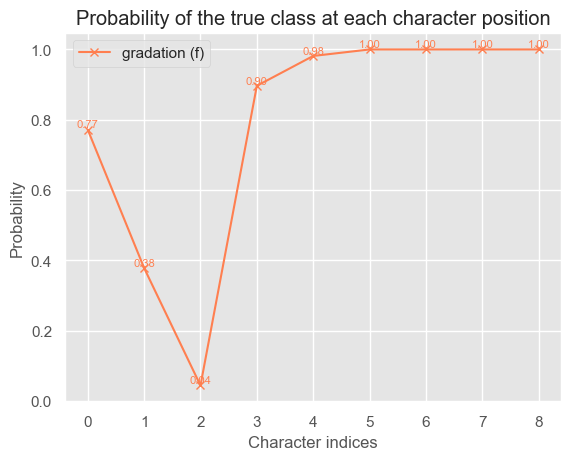

Run 4 of 10:


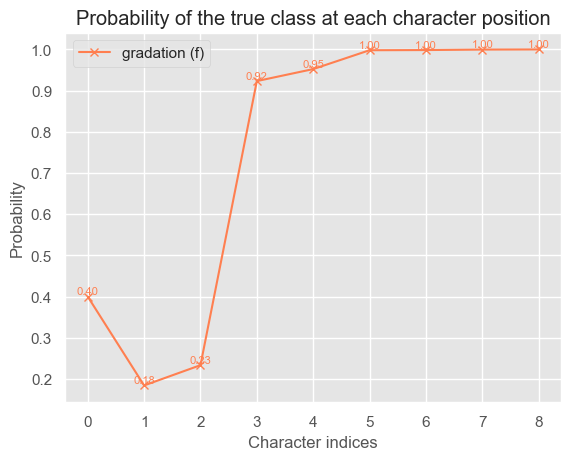

Run 5 of 10:


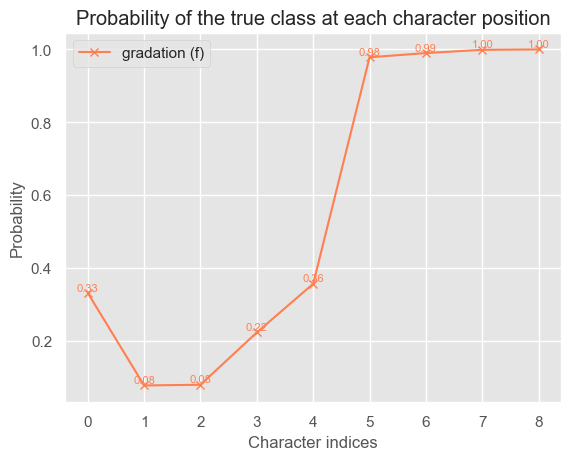

Run 6 of 10:


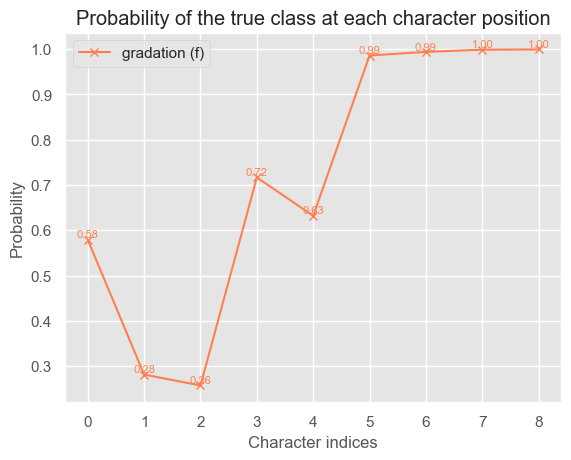

Run 7 of 10:


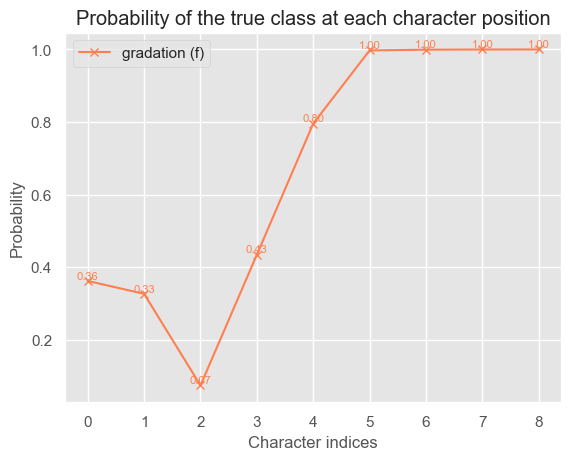

Run 8 of 10:


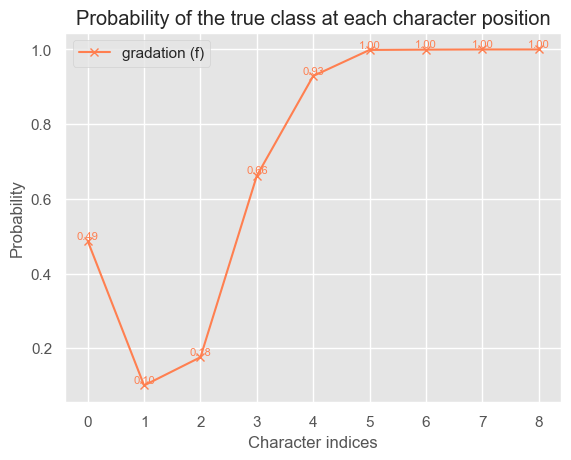

Run 9 of 10:


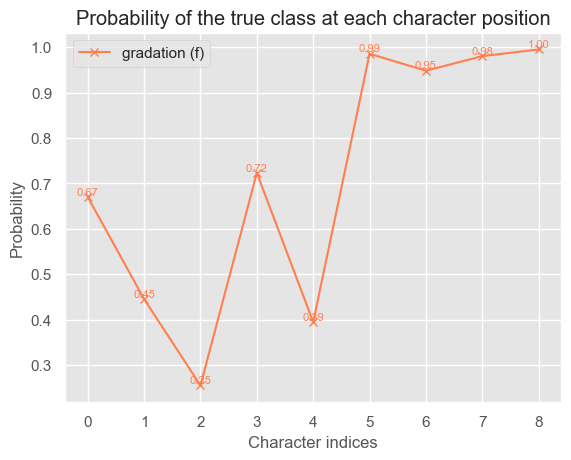

Run 10 of 10:


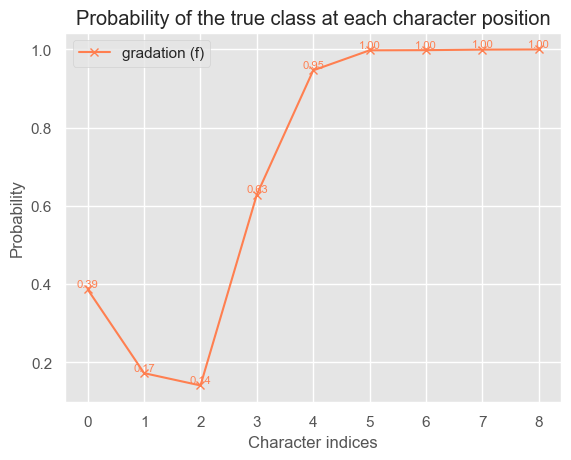

In [11]:
view_plateau(['gradation'], orth_preds_x10, binary=True, multiruns=True)

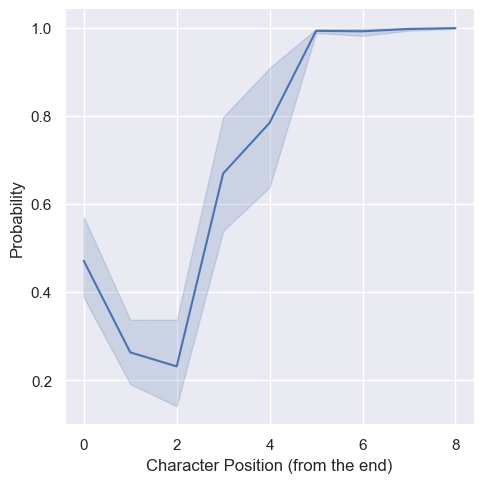

In [12]:
suffix_avg_plot(orth_preds_x10.query("Form == 'gradation'"), 'ion', title=False)

### Phonetic forms

In [66]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds.csv')
phon_preds = (phon_preds.join(echantinom.set_index('sg')[['sfx_allomorph']], on='Form')
              .drop_duplicates('Alt Form')
              .rename(columns={'sfx_allomorph': 'suffix'})
              .reset_index(drop=True)
              )
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,u,houx,m,m,"[('u', {'f': 0.5169596672058105, 'm': 0.483040...",test,0
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,0
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,0
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test,0
4,œj,oeil,m,m,"[('j', {'f': 0.24457314610481262, 'm': 0.75542...",test,0
...,...,...,...,...,...,...,...
4526,ɛ̃sybɔʁdinasjɔ̃,insubordination,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,0
4527,tʁɑ̃splɑ̃tasjɔ̃,transplantation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,asjɔ̃
4528,kɔ̃fidɑ̃sjalite,confidentialité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test,ite
4529,ɛ̃kɔ̃patibilite,incompatibilité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test,ite


In [67]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


77.51048333701169

In [68]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,0
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,0
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test,0
5,aj,ail,f,m,"[('j', {'f': 0.24457314610481262, 'm': 0.75542...",test,0
6,yp,huppe,m,f,"[('p', {'f': 0.4050317704677582, 'm': 0.594968...",test,0
...,...,...,...,...,...,...,...
4450,bɛʁnaʁlɛʁmit,bernard-l'ermite,f,m,"[('t', {'f': 0.4614095389842987, 'm': 0.538590...",test,0
4475,kɔ̃vɑ̃sjOnɛl,conventionnel,f,m,"[('l', {'f': 0.3344738185405731, 'm': 0.665526...",test,0
4483,kɔ̃tʁəpwazɔ̃,contrepoison,f,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,0
4496,mOdysOpEʁɑ̃di,modus operandi,f,m,"[('i', {'f': 0.1249736100435257, 'm': 0.875026...",test,0


In [72]:
phon_preds[phon_preds['Alt Form'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
1226,pasaʒ,passage,m,m,"[('ʒ', {'f': 0.3404069244861603, 'm': 0.659593...",test,aʒ
1526,liɲaʒ,lignage,m,m,"[('ʒ', {'f': 0.3404069244861603, 'm': 0.659593...",test,aʒ
2810,batimɑ̃,bâtiment,m,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,mɑ̃
3148,viʁəmɑ̃,virement,m,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,əmɑ̃
3817,gʁadasjɔ̃,gradation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,asjɔ̃
3826,fɔʁmasjɔ̃,formation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,asjɔ̃


Run 1 of 1:


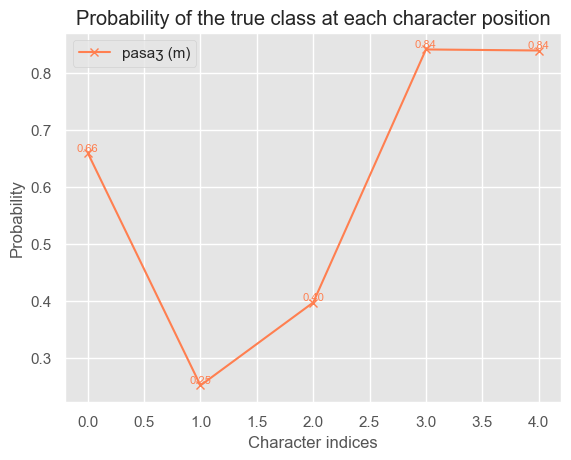

----------------------------------------------------------------------------------------------------

Run 1 of 1:


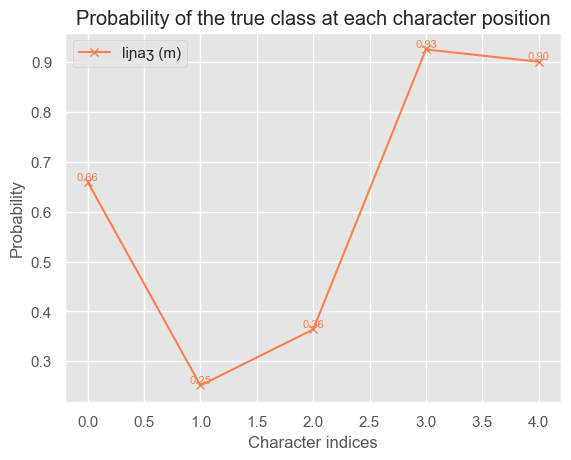

----------------------------------------------------------------------------------------------------

Run 1 of 1:


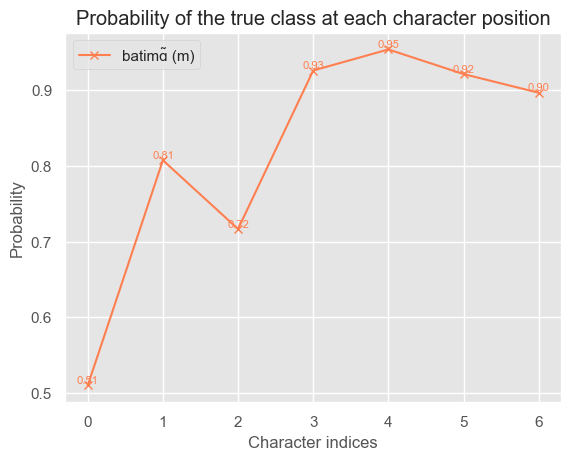

----------------------------------------------------------------------------------------------------

Run 1 of 1:


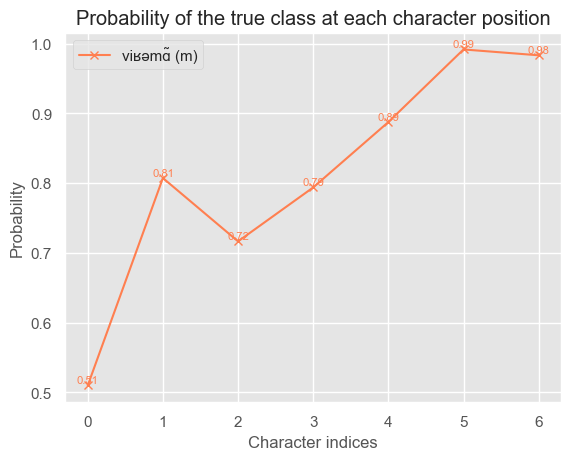

----------------------------------------------------------------------------------------------------

Run 1 of 1:


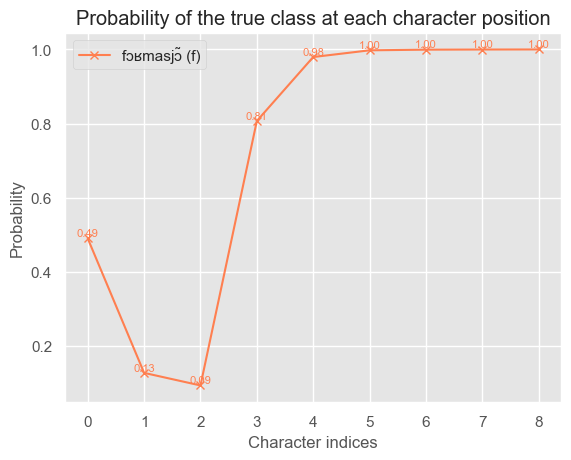

----------------------------------------------------------------------------------------------------

Run 1 of 1:


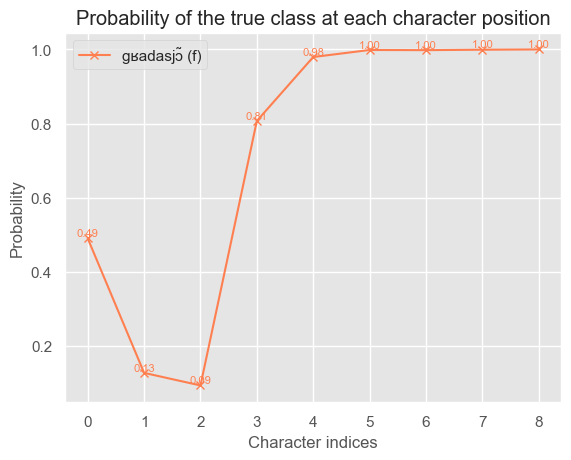

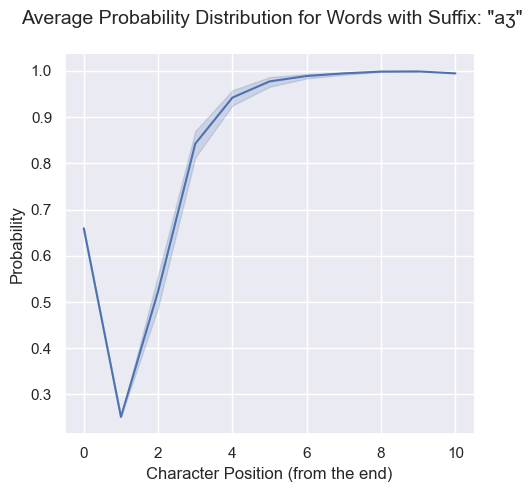

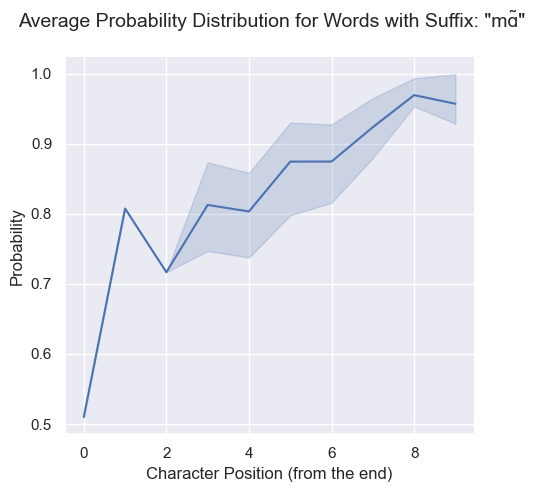

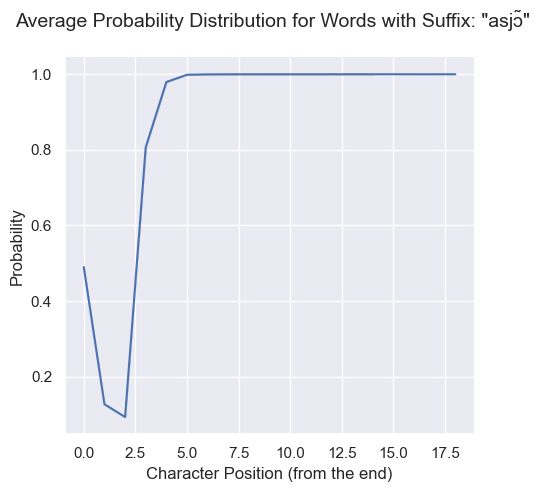

In [74]:
view_plateau(['pasaʒ'], phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['liɲaʒ'], phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['batimɑ̃'], phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['viʁəmɑ̃'], phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['fɔʁmasjɔ̃'], phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau(['gʁadasjɔ̃'], phon_preds, binary=True)

suffix_avg_plot(phon_preds, 'aʒ')
suffix_avg_plot(phon_preds, 'mɑ̃')
suffix_avg_plot(phon_preds, 'asjɔ̃')

In [77]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10.csv')
phon_preds_x10 = (phon_preds_x10.join(echantinom.set_index('sg')[['sfx_allomorph']], on='Form')
                  .drop_duplicates()
                  .rename(columns={'sfx_allomorph': 'suffix'})
                  .reset_index(drop=True)
                  )
phon_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run,suffix
0,ɛ,m,f,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1,0
1,u,f,m,"[('u', {'f': 0.3157658278942108, 'm': 0.684234...",test,1,0
2,ɛ,m,m,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1,0
3,o,m,f,"[('o', {'f': 0.5670557618141174, 'm': 0.432944...",test,1,0
4,ba,m,m,"[('a', {'f': 0.39993923902511597, 'm': 0.60006...",test,1,0
...,...,...,...,...,...,...,...
45305,kɔ̃fidɑ̃sjalite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10,ite
45306,ɛ̃kɔ̃patibilite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10,ite
45307,suzalimɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10,0
45308,tʁɑ̃splɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10,asjɔ̃


Run 1 of 10:


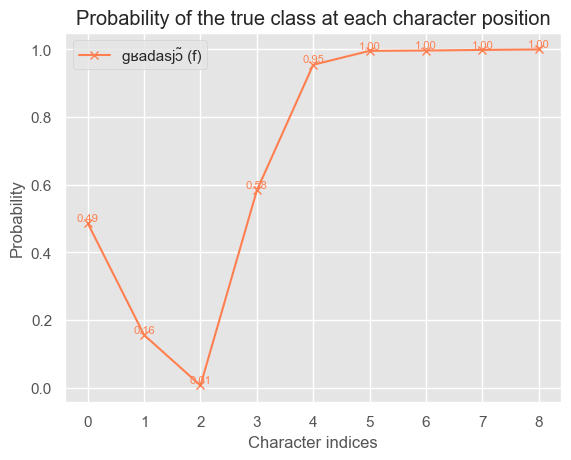

Run 2 of 10:


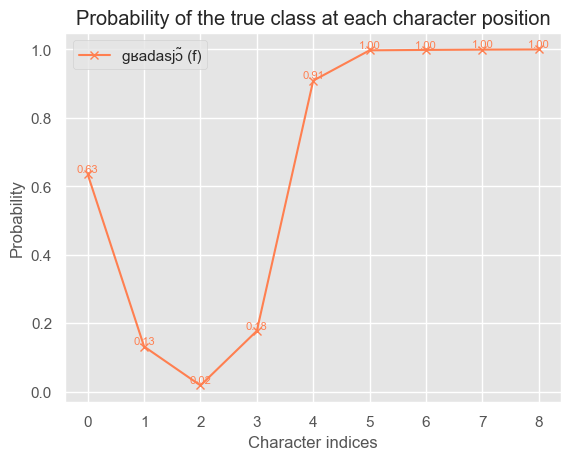

Run 3 of 10:


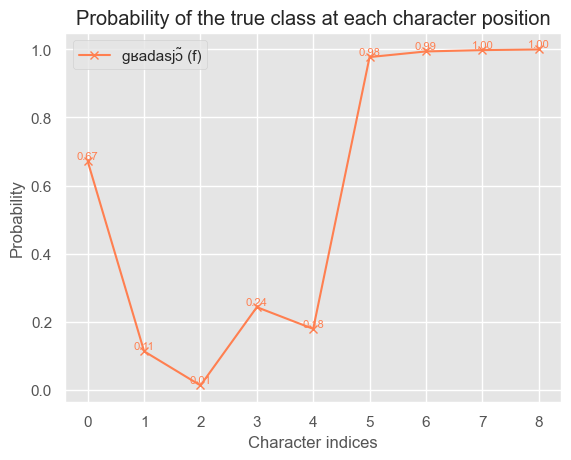

Run 4 of 10:


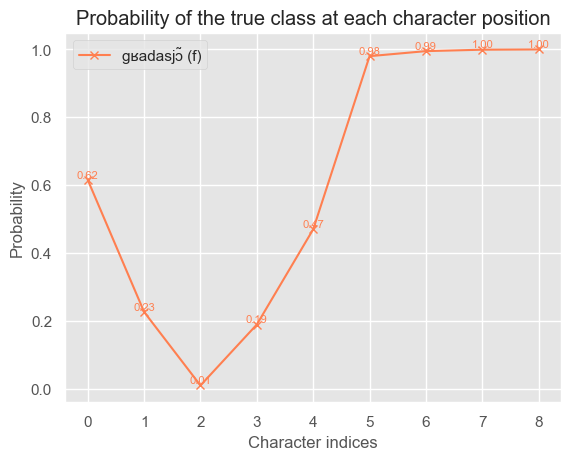

Run 5 of 10:


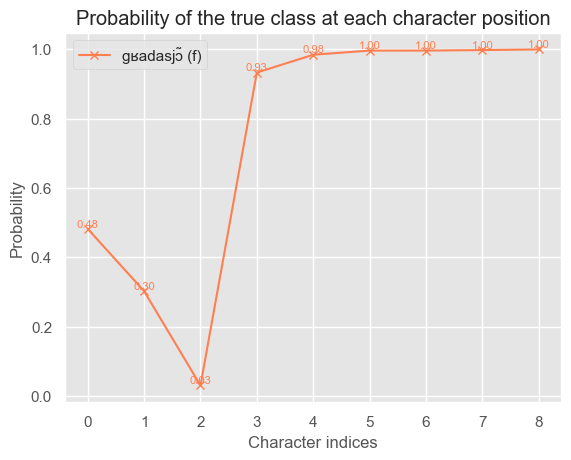

Run 6 of 10:


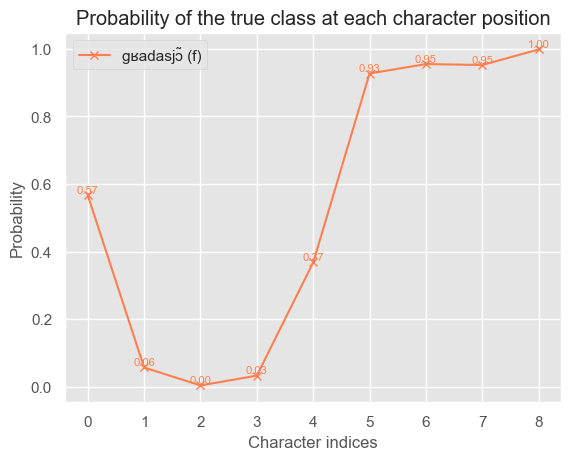

Run 7 of 10:


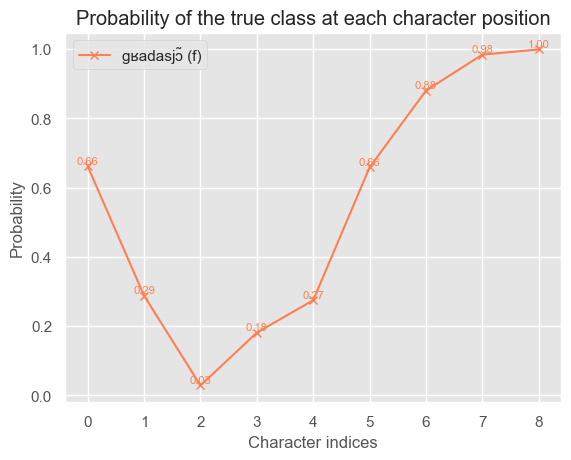

Run 8 of 10:


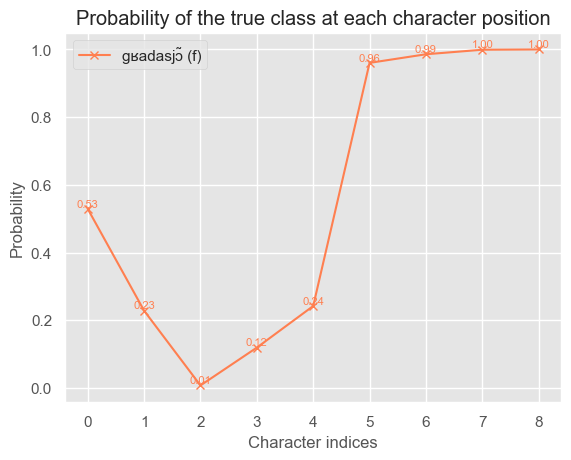

Run 9 of 10:


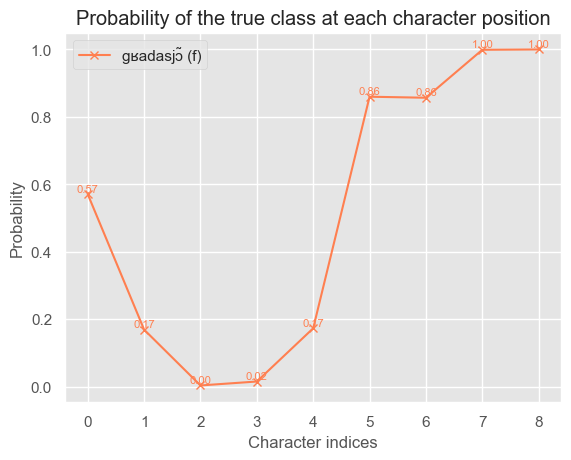

Run 10 of 10:


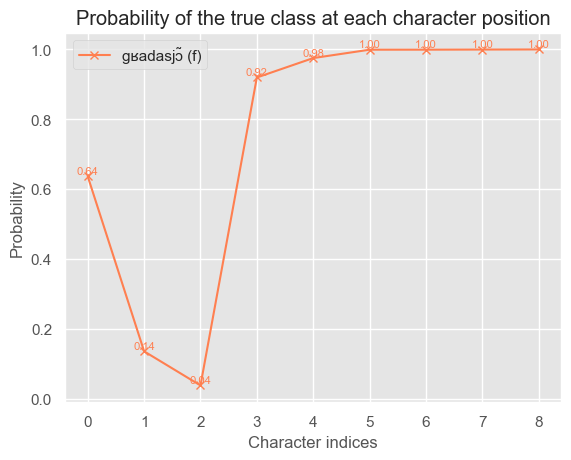

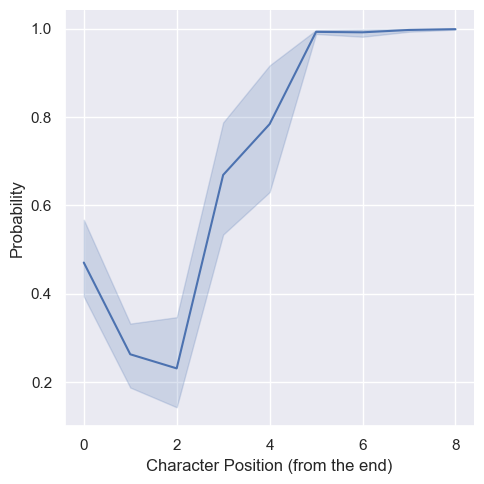

In [79]:
view_plateau(['gʁadasjɔ̃'], phon_preds_x10, binary=True, multiruns=True)

suffix_avg_plot(orth_preds_x10.query("Form == 'gradation'"), 'ion', title=False)

In [ ]:
# [word for word in orth_preds_x10['Form'].tolist() if word.endswith('tion')]

Run 1 of 10:


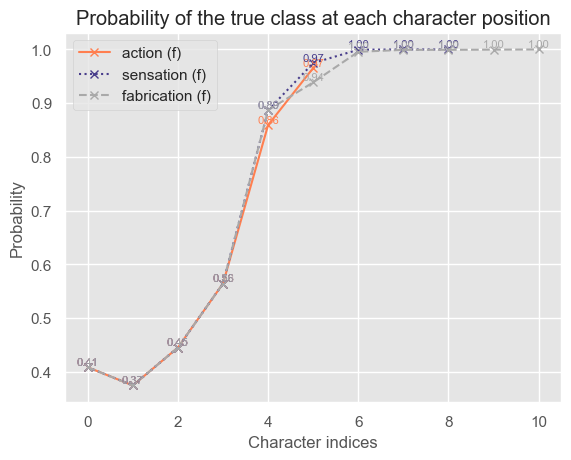

Run 2 of 10:


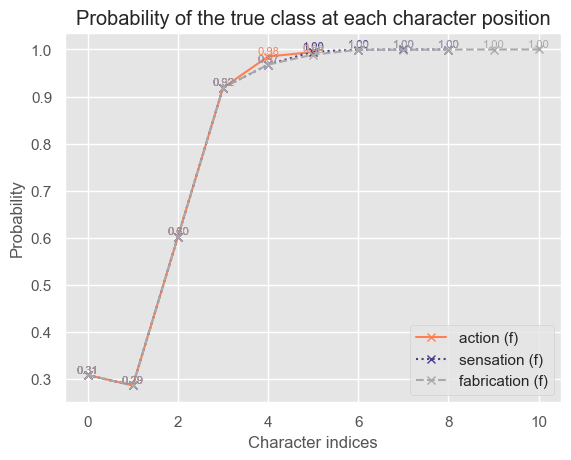

Run 3 of 10:


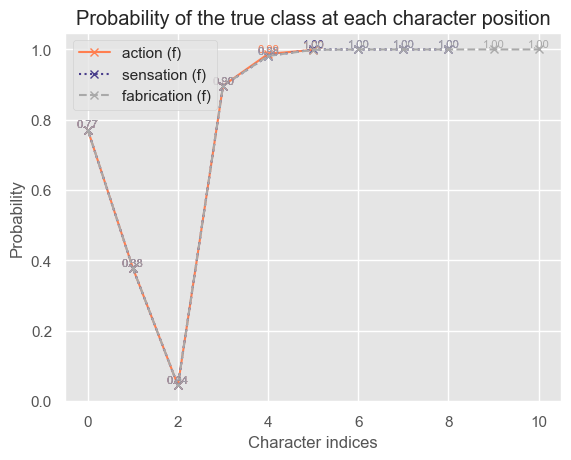

Run 4 of 10:


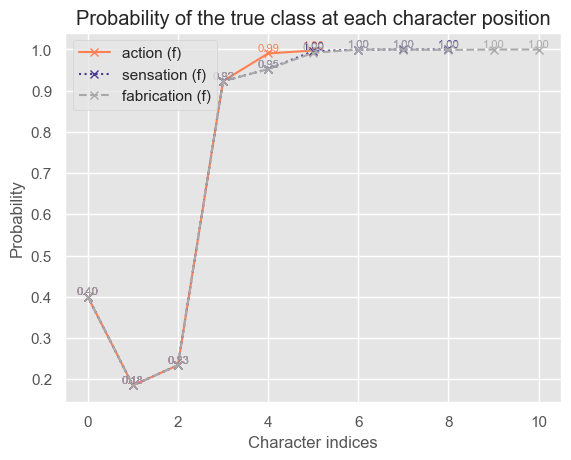

Run 5 of 10:


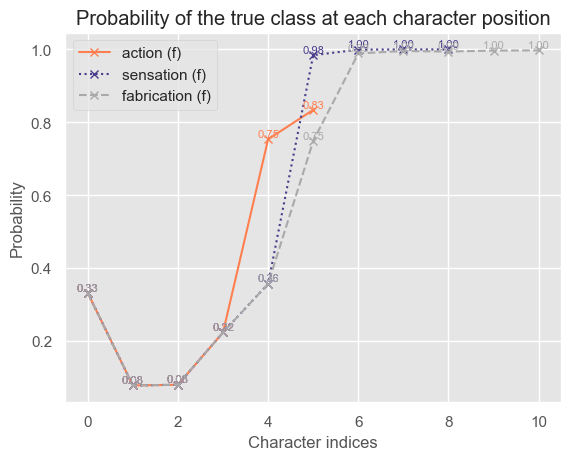

Run 6 of 10:


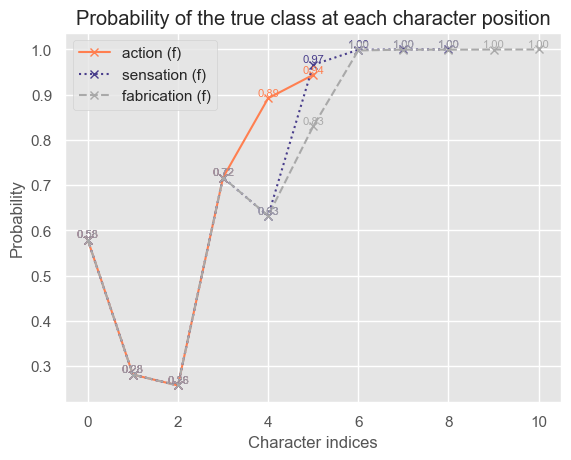

Run 7 of 10:


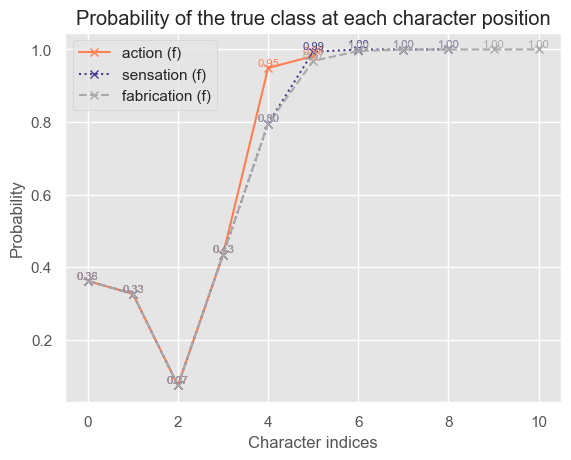

Run 8 of 10:


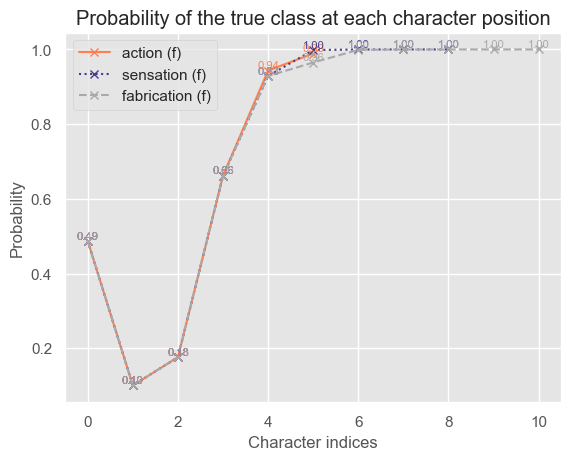

Run 9 of 10:


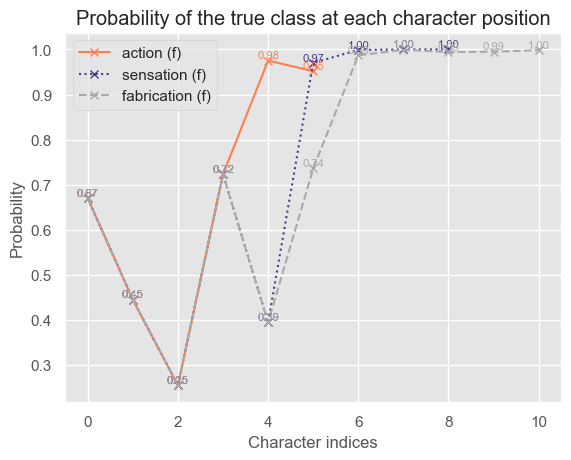

Run 10 of 10:


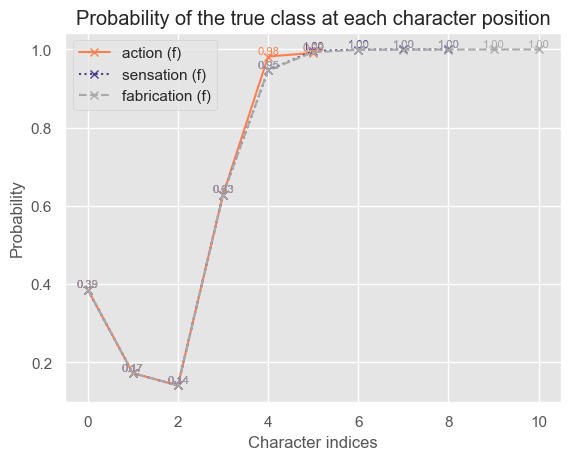

In [80]:
# view_plateau(['emballage', 'repassage', 'nettoyage'], orth_preds_x10, binary=True, multiruns=True)
view_plateau(['action', 'sensation', 'fabrication'], orth_preds_x10, binary=True, multiruns=True)

### Quantifying differences between plots

In [81]:
from stats import EMD

In [82]:
word_a = 'action'
word_b = 'sensation'
run = 1

emd = EMD(orth_preds)
print(f'EMD from orth_preds: {emd.cost(word_a, word_b)}')

emd = EMD(orth_preds_x10)
print(f'EMD from first run of orth_preds_x10: {emd.cost(word_a, word_b, run)}')

EMD from orth_preds: 0.007299909989039104
EMD from first run of orth_preds_x10: 0.006143480539321901


In [83]:
word_a = 'passage'
word_b = 'lignage'
run = 1

emd = EMD(orth_preds)
print(f'EMD from orth_preds: {emd.cost(word_a, word_b)}')

emd = EMD(orth_preds_x10)
print(f'EMD from first run of orth_preds_x10: {emd.cost(word_a, word_b, run)}')

EMD from orth_preds: 0.013337850570678711
EMD from first run of orth_preds_x10: 0.04528688532965524
